# Análise de dados NHANES 2017-2018
Esta análise consiste do estudo de dados demográficos, de medidas corporais e pressão sanguínea obtido através do programa NHANES (National Health and Nutrition Examination Survey) conduzido nos Estados Unidos da América durante os anos de 2017-2018.

In [41]:
import numpy as np
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
DEMO = pd.read_sas('/content/gdrive/My Drive/11º Período/Ciencia de Dados/DEMO_J.XPT', index='SEQN')
DEMO = DEMO[['RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'DMDMARTL']]
display(DEMO.head())
DEMO.shape

,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDMARTL
SEQN,,,,
93703.0,2.0,2.0,NaN,NaN
93704.0,1.0,2.0,NaN,NaN
93705.0,2.0,66.0,2.0,3.0
93706.0,1.0,18.0,NaN,NaN
93707.0,1.0,13.0,NaN,NaN


(9254, 4)

In [43]:
BMX = pd.read_sas('/content/gdrive/My Drive/11º Período/Ciencia de Dados/BMX_J.XPT', index='SEQN')
BMX = BMX[['BMXWT', 'BMXHT']]
display(BMX.head())
BMX.shape

,BMXWT,BMXHT
SEQN,,
93703.0,13.7,88.6
93704.0,13.9,94.2
93705.0,79.5,158.3
93706.0,66.3,175.7
93707.0,45.4,158.4


(8704, 2)

In [44]:
BPX = pd.read_sas('/content/gdrive/My Drive/11º Período/Ciencia de Dados/BPX_J.XPT', index='SEQN') 
BPX = BPX[['BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2']]
display(BPX.head())
BPX.shape

,BPXSY1,BPXDI1,BPXSY2,BPXDI2
SEQN,,,,
93703.0,NaN,NaN,NaN,NaN
93704.0,NaN,NaN,NaN,NaN
93705.0,NaN,NaN,NaN,NaN
93706.0,112.0,74.0,114.0,70.0
93707.0,128.0,38.0,128.0,46.0


(8704, 4)

In [45]:
df = pd.merge(DEMO, BMX, left_index=True, right_index=True, how='inner')
df = pd.merge(df, BPX, left_index=True, right_index=True, how='inner')
display(df.head())
df.shape

,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDMARTL,BMXWT,BMXHT,BPXSY1,BPXDI1,BPXSY2,BPXDI2
SEQN,,,,,,,,,,
93703.0,2.0,2.0,NaN,NaN,13.7,88.6,NaN,NaN,NaN,NaN
93704.0,1.0,2.0,NaN,NaN,13.9,94.2,NaN,NaN,NaN,NaN
93705.0,2.0,66.0,2.0,3.0,79.5,158.3,NaN,NaN,NaN,NaN
93706.0,1.0,18.0,NaN,NaN,66.3,175.7,112.0,74.0,114.0,70.0
93707.0,1.0,13.0,NaN,NaN,45.4,158.4,128.0,38.0,128.0,46.0


(8704, 10)

In [46]:
df.columns = ['Gender','Age','Education','Marital','Weight','Height','Systole1','Diastole1','Systole2','Diastole2']
df.Gender = df.Gender.replace({1.0: 'Male', 2.0: 'Female'})
df.Education = df.Education.replace({1.0: '-9th', 2.0: '9-11th', 3.0: 'High School', 4.0: 'Some College', 5.0: 'Graduate+', 7.0: 'Refused', 8.0: 'Don\'t Know'})
df.Marital = df.Marital.replace({1.0: 'Married', 2.0: 'Widowed', 3.0: 'Divorced', 4.0: 'Separated', 5.0: 'Never Married', 6.0: 'Living With Partner', 77: 'Refused', 99: 'Don\'t Know'})
display(df.head())
df.shape

,Gender,Age,Education,Marital,Weight,Height,Systole1,Diastole1,Systole2,Diastole2
SEQN,,,,,,,,,,
93703.0,Female,2.0,NaN,NaN,13.7,88.6,NaN,NaN,NaN,NaN
93704.0,Male,2.0,NaN,NaN,13.9,94.2,NaN,NaN,NaN,NaN
93705.0,Female,66.0,9-11th,Divorced,79.5,158.3,NaN,NaN,NaN,NaN
93706.0,Male,18.0,NaN,NaN,66.3,175.7,112.0,74.0,114.0,70.0
93707.0,Male,13.0,NaN,NaN,45.4,158.4,128.0,38.0,128.0,46.0


(8704, 10)

Devido a discrepância entre os dados de crianças e adultos, a análise que segue considerará apenas as pessoas examinadas que tenham mais de 18 anos de idade.

In [47]:
df = df[df['Age']>=18.0].copy()

df['Height'] = df['Height']*0.01
df['BMI'] = df['Weight']/(df['Height']**2)
display(df.head())
df.shape

,Gender,Age,Education,Marital,Weight,Height,Systole1,Diastole1,Systole2,Diastole2,BMI
SEQN,,,,,,,,,,,
93705.0,Female,66.0,9-11th,Divorced,79.5,1.583,NaN,NaN,NaN,NaN,31.725268
93706.0,Male,18.0,NaN,NaN,66.3,1.757,112.0,74.0,114.0,70.0,21.476821
93708.0,Female,66.0,-9th,Married,53.5,1.502,NaN,NaN,138.0,78.0,23.714497
93709.0,Female,75.0,Some College,Widowed,88.8,1.511,120.0,66.0,118.0,66.0,38.894128
93711.0,Male,56.0,Graduate+,Married,62.1,1.706,108.0,68.0,94.0,68.0,21.337009


(5533, 11)

In [48]:
df.describe()

,Age,Weight,Height,Systole1,Diastole1,Systole2,Diastole2,BMI
count,5533.000000,5444.000000,5444.000000,4899.000000,4.899000e+03,5128.000000,5.128000e+03,5434.000000
mean,49.816555,82.468993,1.663623,125.984895,7.165462e+01,126.246490,7.210686e+01,29.691481
std,18.649364,22.980417,0.100669,19.728263,1.356110e+01,20.282001,1.313658e+01,7.439997
min,18.000000,32.600000,1.383000,72.000000,5.397605e-79,72.000000,5.397605e-79,14.203401
25%,33.000000,66.500000,1.589000,112.000000,6.400000e+01,112.000000,6.400000e+01,24.576145
50%,51.000000,78.900000,1.659000,124.000000,7.200000e+01,124.000000,7.200000e+01,28.457344
75%,65.000000,94.500000,1.736000,136.000000,8.000000e+01,136.000000,8.000000e+01,33.489376
max,80.000000,242.600000,1.977000,228.000000,1.360000e+02,236.000000,1.360000e+02,86.160237


In [49]:
df.isna().sum()

Gender         0
Age            0
Education    268
Marital      268
Weight        89
Height        89
Systole1     634
Diastole1    634
Systole2     405
Diastole2    405
BMI           99
dtype: int64

## Analisando as medidas de pressão sistólica

#### Comparação entre todas as amostras de pressão sistólica 1 e 2

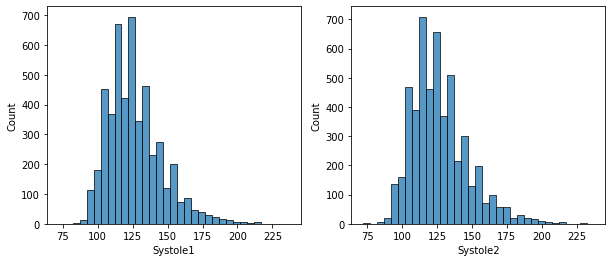

In [50]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True)
sns.histplot(data=df, x='Systole1', binwidth=5, ax=axes[0])
sns.histplot(data=df, x='Systole2', binwidth=5, ax=axes[1])
plt.show()

		Pearson corr: 0.9662


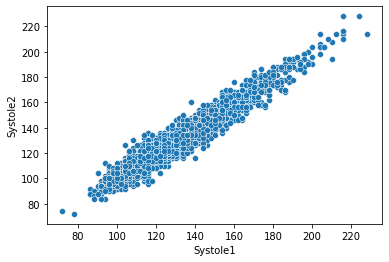

In [51]:
print('\t\tPearson corr: {:.4f}'.format(df['Systole1'].corr(df['Systole2'])))
sns.scatterplot(data=df, x='Systole1', y='Systole2');

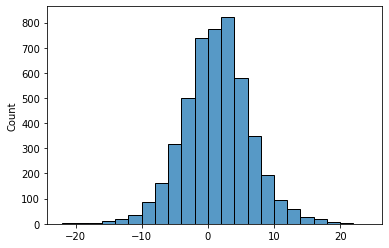

In [113]:
sns.histplot((df['Systole1'] - df['Systole2']).dropna(), binwidth=2);

In [53]:
stats.shapiro((df['Systole1'] - df['Systole2']).dropna())

(0.980015754699707, 1.6770638037936043e-25)

In [110]:
stats.ttest_rel(df['Systole1'], df['Systole2'], nan_policy='omit')

Ttest_relResult(statistic=4.649780636668616, pvalue=3.4118690010759628e-06)

In [108]:
df1 = df.loc[(df['Systole1'].notna()) & (df['Systole2'].notna())]
stats.wilcoxon(df1['Systole1'], df1['Systole2'])

WilcoxonResult(statistic=3753289.0, pvalue=1.1126664288560027e-05)

/bin/bash: -c: line 1: syntax error: unexpected end of file


#### Comparação da pressão sistólica 1 por sexo e idade
A pressão sistólica alta é um forte de indicador de doenças como hipertensão arterial.

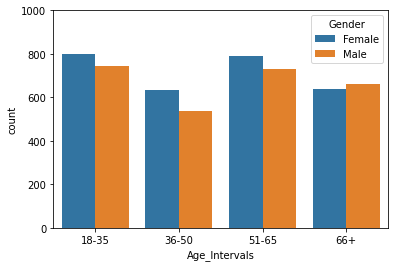

In [56]:
df['Age_Intervals'] = pd.cut(df['Age'], [18,35,50,65,80], include_lowest=True, labels=['18-35','36-50','51-65','66+'])
sns.countplot(data=df, x='Age_Intervals', hue='Gender').set(ylim=(0,1000));

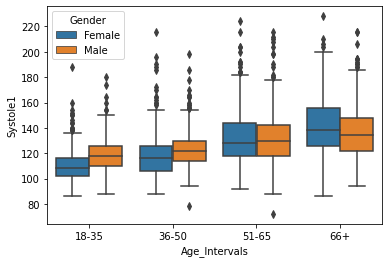

In [57]:
sns.boxplot(data=df, x='Age_Intervals', y='Systole1', hue='Gender');

In [58]:
for age in ['18-35','36-50','51-65','66+']:
  print('Age {}:'.format(age))
  male_systole1 = df.loc[(df['Gender']=='Male') & (df['Age_Intervals']==age),'Systole1'].dropna()
  female_systole1 = df.loc[(df['Gender']=='Female') & (df['Age_Intervals']==age),'Systole1'].dropna()
  print('Male: Shapiro = {}'.format(stats.shapiro(male_systole1)))
  print('Female: Shapiro = {}'.format(stats.shapiro(female_systole1)))
  print(stats.ttest_ind(male_systole1, female_systole1), end='\n\n')

Age 18-35:
Male: Shapiro = (0.9706166386604309, 2.071271071324432e-10)
Female: Shapiro = (0.9366715550422668, 6.89477936922304e-17)
Ttest_indResult(statistic=14.064597465133028, pvalue=4.1352580873698016e-42)

Age 36-50:
Male: Shapiro = (0.957950234413147, 1.5460249747079047e-10)
Female: Shapiro = (0.9224153757095337, 3.998170740981261e-16)
Ttest_indResult(statistic=5.28096893085716, pvalue=1.568247483672965e-07)

Age 51-65:
Male: Shapiro = (0.9610551595687866, 4.158907159629299e-12)
Female: Shapiro = (0.9630112648010254, 3.428596165658271e-12)
Ttest_indResult(statistic=0.20078772969684835, pvalue=0.8408950512096278)

Age 66+:
Male: Shapiro = (0.9648102521896362, 1.1646388020647436e-10)
Female: Shapiro = (0.9817180037498474, 2.3296238396142144e-06)
Ttest_indResult(statistic=-4.8837446493293974, pvalue=1.1902037109399753e-06)



#### Comparação da pressão sistólica 1 por índice de massa corporal

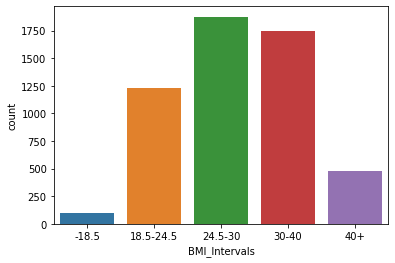

In [69]:
df['BMI_Intervals'] = pd.cut(df['BMI'], [10,18.5,24.5,30,40,90], labels=['-18.5','18.5-24.5','24.5-30','30-40','40+'])
sns.countplot(data=df, x='BMI_Intervals');

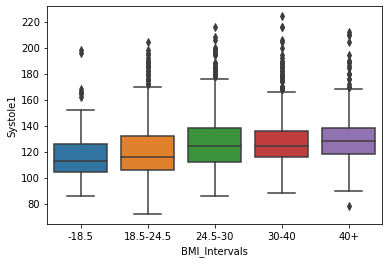

In [70]:
sns.boxplot(data=df, x='BMI_Intervals', y='Systole1');

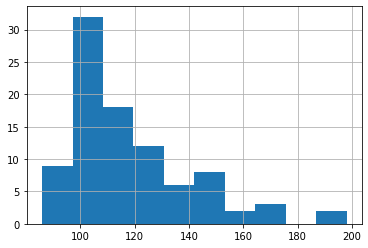

In [112]:
df.loc[df['BMI_Intervals']=='-18.5','Systole1'].hist();

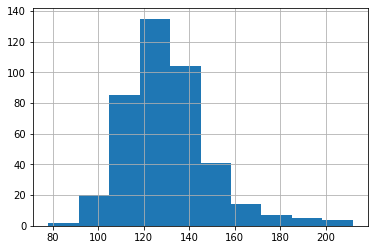

In [111]:
df.loc[df['BMI_Intervals']=='40+','Systole1'].dropna().hist();

In [81]:
}under_weight_systole1 = df.loc[df['BMI_Intervals']=='-18.5','Systole1'].dropna()
over_weight_systole1 = df.loc[df['BMI_Intervals']=='40+','Systole1'].dropna()
print('-18.5: Shapiro = {}'.format(stats.shapiro(under_weight_systole1)))
print('40+: Shapiro = {}'.format(stats.shapiro(over_weight_systole1)))
print(stats.mannwhitneyu(under_weight_systole1, over_weight_systole1), end='\n\n')

-18.5: Shapiro = (0.8829663395881653, 5.999510221954552e-07)
40+: Shapiro = (0.9296699166297913, 4.2291075697843683e-13)
MannwhitneyuResult(statistic=11083.0, pvalue=1.0961659575658842e-10)



## Analisando as medidas de pressão diastólica

#### Comparação entre todas as amostras de pressão diastólica 1 e 2

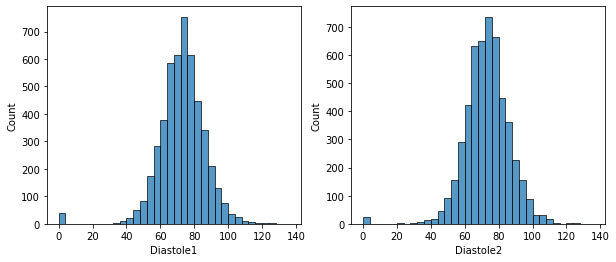

In [82]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True)
sns.histplot(data=df, x='Diastole1', binwidth=4, ax=axes[0])
sns.histplot(data=df, x='Diastole2', binwidth=4, ax=axes[1])
plt.show()

		Pearson corr: 0.8838


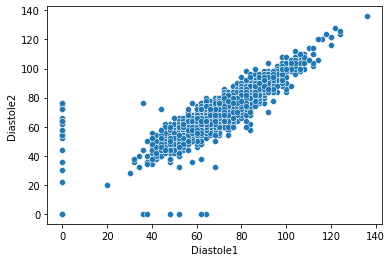

In [74]:
print('\t\tPearson corr: {:.4f}'.format(df['Diastole1'].corr(df['Diastole2'])))
sns.scatterplot(data=df, x='Diastole1', y='Diastole2');

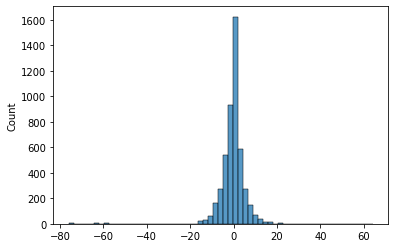

In [97]:
sns.histplot(df['Diastole1'] - df['Diastole2'], binwidth=2.3);